In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import pandas as pd
import json

In [91]:
emissions_df = pd.read_csv('/content/drive/MyDrive/Data /OECD.ENV.EPI,DSD_AIR_EMISSIONS@DF_AIR_EMISSIONS,+all.csv')

/tmp/ipython-input-91-605386169.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  emissions_df = pd.read_csv('/content/drive/MyDrive/Data /OECD.ENV.EPI,DSD_AIR_EMISSIONS@DF_AIR_EMISSIONS,+all.csv')


In [92]:
with open('/content/drive/MyDrive/Data /GIDDImport.json') as f:
    disasters_json = json.load(f)
events_list = disasters_json['results']
events_df = pd.DataFrame(events_list)

# Explore and audit data

In [93]:
print("Emissions data shape:", emissions_df.shape)
print("Columns:", emissions_df.columns.tolist()[:10], "...")
display(emissions_df.head(3))

print("Disasters data shape:", events_df.shape)
print("Sample event record:", events_df.head(3).T)

Emissions data shape: (180051, 36)
Columns: ['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA', 'Reference area', 'FREQ', 'Frequency of observation', 'POLLUTANT', 'Pollutant'] ...


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,POLLUTANT,Pollutant,...,UNIT_MULT,Unit multiplier,PRICE_BASE,Price base,BASE_PER,Base period,DECIMALS,Decimals,CONVERSION_TYPE,Conversion type
0,DATAFLOW,OECD.ENV.EPI:DSD_AIR_EMISSIONS@DF_AIR_EMISSION...,Air emissions - Air pollutants Inventories,I,COL,Colombia,A,Annual,CO,Carbon monoxide,...,0,Units,Q,Constant prices,2015.0,NaN,2,Two,NaN,NaN
1,DATAFLOW,OECD.ENV.EPI:DSD_AIR_EMISSIONS@DF_AIR_EMISSION...,Air emissions - Air pollutants Inventories,I,COL,Colombia,A,Annual,CO,Carbon monoxide,...,0,Units,Q,Constant prices,2015.0,NaN,2,Two,NaN,NaN
2,DATAFLOW,OECD.ENV.EPI:DSD_AIR_EMISSIONS@DF_AIR_EMISSION...,Air emissions - Air pollutants Inventories,I,COL,Colombia,A,Annual,CO,Carbon monoxide,...,0,Units,Q,Constant prices,2015.0,NaN,2,Two,NaN,NaN


Disasters data shape: (13198, 22)
Sample event record:                                                           0  \
iso3                                                    AFG   
country_name                                    Afghanistan   
year                                                   2008   
start_date                                       2008-08-01   
start_date_accuracy                                   Month   
end_date                                         2008-08-01   
end_date_accuracy                                     Month   
event_name                  Afghanistan: Flood - 01/08/2008   
new_displacement                                        180   
new_displacement_rounded                                180   
total_displacement                                      NaN   
total_displacement_rounded                              NaN   
hazard_category                                           2   
hazard_category_name                        Weather related   


# Clean data

In [94]:
threshold = len(emissions_df) * 0.6
cols_before = emissions_df.shape[1]
emissions_df = emissions_df.dropna(axis=1, thresh=int(threshold) + 1)
cols_after = emissions_df.shape[1]
print(f"Emissions data: dropped {cols_before - cols_after} columns (>{60}% missing).")

threshold = len(events_df) * 0.6
cols_before = events_df.shape[1]
events_df = events_df.dropna(axis=1, thresh=int(threshold) + 1)
cols_after = events_df.shape[1]
print(f"Disasters data: dropped {cols_before - cols_after} columns (>{60}% missing).")

print("Emissions columns after cleaning:", emissions_df.columns.tolist())
print("Disasters columns after cleaning:", events_df.columns.tolist())

Emissions data: dropped 14 columns (>60% missing).
Disasters data: dropped 2 columns (>60% missing).
Emissions columns after cleaning: ['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA', 'Reference area', 'FREQ', 'Frequency of observation', 'POLLUTANT', 'Pollutant', 'MEASURE', 'Measure', 'UNIT_MEASURE', 'Unit of measure', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_STATUS', 'Observation status', 'UNIT_MULT', 'Unit multiplier', 'DECIMALS', 'Decimals']
Disasters columns after cleaning: ['iso3', 'country_name', 'year', 'start_date', 'start_date_accuracy', 'end_date', 'end_date_accuracy', 'event_name', 'new_displacement', 'new_displacement_rounded', 'hazard_category', 'hazard_category_name', 'hazard_sub_category', 'hazard_sub_category_name', 'hazard_type', 'hazard_type_name', 'hazard_sub_type', 'hazard_sub_type_name', 'event_codes', 'event_codes_type']


In [95]:
display(emissions_df.head(3))
display(events_df.head(3))
print(emissions_df.shape)
print(events_df.shape)

emissions_df.drop(
    ['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION',
     'FREQ', 'Frequency of observation', 'POLLUTANT', 'MEASURE',
     'UNIT_MEASURE', 'OBS_STATUS', 'DECIMALS'],
    axis=1,
    inplace=True
)

events_df.drop([
    'start_date', 'start_date_accuracy', 'end_date', 'end_date_accuracy',
    'new_displacement_rounded', 'hazard_category', 'hazard_sub_category',
    'hazard_type', 'hazard_sub_type', 'event_codes', 'event_codes_type', 'hazard_sub_type_name'
], axis=1, inplace=True)

print(emissions_df.shape)
print(events_df.shape)


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,POLLUTANT,Pollutant,...,UNIT_MEASURE,Unit of measure,TIME_PERIOD,OBS_VALUE,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ENV.EPI:DSD_AIR_EMISSIONS@DF_AIR_EMISSION...,Air emissions - Air pollutants Inventories,I,COL,Colombia,A,Annual,CO,Carbon monoxide,...,KG_10P3USD,Kilogrammes per 1 000 US dollars,2010,3.605742,A,Normal value,0,Units,2,Two
1,DATAFLOW,OECD.ENV.EPI:DSD_AIR_EMISSIONS@DF_AIR_EMISSION...,Air emissions - Air pollutants Inventories,I,COL,Colombia,A,Annual,CO,Carbon monoxide,...,KG_10P3USD,Kilogrammes per 1 000 US dollars,2011,3.383611,A,Normal value,0,Units,2,Two
2,DATAFLOW,OECD.ENV.EPI:DSD_AIR_EMISSIONS@DF_AIR_EMISSION...,Air emissions - Air pollutants Inventories,I,COL,Colombia,A,Annual,CO,Carbon monoxide,...,KG_10P3USD,Kilogrammes per 1 000 US dollars,2012,3.267966,A,Normal value,0,Units,2,Two


,iso3,country_name,year,start_date,start_date_accuracy,end_date,end_date_accuracy,event_name,new_displacement,new_displacement_rounded,hazard_category,hazard_category_name,hazard_sub_category,hazard_sub_category_name,hazard_type,hazard_type_name,hazard_sub_type,hazard_sub_type_name,event_codes,event_codes_type
0,AFG,Afghanistan,2008,2008-08-01,Month,2008-08-01,Month,Afghanistan: Flood - 01/08/2008,180,180,2,Weather related,3,Hydrological,10,Flood,13,Flood,[],[]
1,AFG,Afghanistan,2008,2008-04-17,Day,2008-04-17,Day,Afghanistan: Earthquake - 17/04/2008,3250,3200,1,Geophysical,1,Geophysical,1,Earthquake,1,Earthquake,[],[]
2,ARG,Argentina,2008,2008-01-28,Day,2008-03-30,Day,Argentina: Flood - 28/01/2008,635,640,2,Weather related,3,Hydrological,10,Flood,13,Flood,[],[]


(180051, 22)
(13198, 20)
(180051, 11)
(13198, 8)


/tmp/ipython-input-95-3851317391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissions_df.drop(


In [96]:
display(emissions_df.head(10))
display(events_df.head(10))

,REF_AREA,Reference area,Pollutant,Measure,Unit of measure,TIME_PERIOD,OBS_VALUE,Observation status,UNIT_MULT,Unit multiplier,Decimals
0,COL,Colombia,Carbon monoxide,Total man-made emissions,Kilogrammes per 1 000 US dollars,2010,3.605742,Normal value,0,Units,Two
1,COL,Colombia,Carbon monoxide,Total man-made emissions,Kilogrammes per 1 000 US dollars,2011,3.383611,Normal value,0,Units,Two
2,COL,Colombia,Carbon monoxide,Total man-made emissions,Kilogrammes per 1 000 US dollars,2012,3.267966,Normal value,0,Units,Two
3,COL,Colombia,Carbon monoxide,Total man-made emissions,Kilogrammes per 1 000 US dollars,2013,3.079577,Normal value,0,Units,Two
4,COL,Colombia,Carbon monoxide,Total man-made emissions,Kilogrammes per 1 000 US dollars,2014,2.979645,Normal value,0,Units,Two
5,COL,Colombia,Carbon monoxide,Total man-made emissions,Kilogrammes per 1 000 US dollars,2015,2.845077,Normal value,0,Units,Two
6,COL,Colombia,Carbon monoxide,Total man-made emissions,Kilogrammes per 1 000 US dollars,2016,2.804969,Normal value,0,Units,Two
7,COL,Colombia,Carbon monoxide,Total man-made emissions,Kilogrammes per 1 000 US dollars,2017,2.749240,Normal value,0,Units,Two
8,COL,Colombia,Carbon monoxide,Total man-made emissions,Kilogrammes per 1 000 US dollars,2018,2.726936,Normal value,0,Units,Two
9,DEU,Germany,Particulates (PM10),Total man-made emissions,Kilogrammes per person,1995,4.136535,Normal value,0,Units,Two


,iso3,country_name,year,event_name,new_displacement,hazard_category_name,hazard_sub_category_name,hazard_type_name
0,AFG,Afghanistan,2008,Afghanistan: Flood - 01/08/2008,180,Weather related,Hydrological,Flood
1,AFG,Afghanistan,2008,Afghanistan: Earthquake - 17/04/2008,3250,Geophysical,Geophysical,Earthquake
2,ARG,Argentina,2008,Argentina: Flood - 28/01/2008,635,Weather related,Hydrological,Flood
3,ATG,Antigua and Barbuda,2008,Antigua and Barbuda: Storm - 15/10/2008,45,Weather related,Meteorological,Storm
4,AUS,Australia,2008,Australia: Storm - 16/11/2008,1000,Weather related,Meteorological,Storm
5,BDI,Burundi,2008,Burundi: Flood - 20/09/2008,2770,Weather related,Hydrological,Flood
6,BEN,Benin,2008,Benin: Flood - 01/07/2008,150000,Weather related,Hydrological,Flood
7,BFA,Burkina Faso,2008,Burkina Faso: Flood - 01/08/2008,28000,Weather related,Hydrological,Flood
8,BGD,Bangladesh,2008,Bangladesh: Landslide/Wet mass movement - 16/0...,1657,Weather related,Hydrological,Mass Movement
9,BGD,Bangladesh,2008,Bangladesh: Flood - 01/07/2008,2250,Weather related,Hydrological,Flood


In [97]:
emissions_df.rename(columns={'REF_AREA': 'iso3', 'Reference area': 'country_name', 'TIME_PERIOD': 'year'}, inplace=True)

In [98]:
emissions_df['Pollutant'].value_counts()

,count
Pollutant,
Non-methane volatile organic compounds,27414
Carbon monoxide,27119
Nitrogen oxides,27078
Sulphur oxides,26627
Particulates (PM10),24590
Particulates (PM2.5),24364
Ammonia,22859


In [99]:
pollutants = [
    'Non-methane volatile organic compounds',
    'Carbon monoxide',
    'Nitrogen oxides',
    'Sulphur oxides',
    'Particulates (PM10)',
    'Particulates (PM2.5)',
    'Ammonia'
]

for pollutant in pollutants:
    count = emissions_df[emissions_df['Pollutant'].str.contains(pollutant, na=False)]['country_name'].nunique()
    print(f"{pollutant}: {count} unique countries")

Non-methane volatile organic compounds: 61 unique countries
Carbon monoxide: 61 unique countries
Nitrogen oxides: 61 unique countries
Sulphur oxides: 61 unique countries
Particulates (PM10): 0 unique countries


/tmp/ipython-input-99-2850974052.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = emissions_df[emissions_df['Pollutant'].str.contains(pollutant, na=False)]['country_name'].nunique()


Particulates (PM2.5): 0 unique countries
Ammonia: 51 unique countries


In [100]:
emissions_df['Measure'].value_counts()

,count
Measure,
Total man-made emissions,47288
Total stationary sources,11783
Agriculture,11493
Combustion,11471
Other combustions,11309
Total mobile sources,11300
Industrial combustion,11203
Industrial processes and product use,11156
Road transport,11035


In [101]:
measures = [
    'Total man-made emissions',
    'Total stationary sources',
    'Agriculture',
    'Combustion',
    'Other combustions',
    'Total mobile sources',
    'Industrial combustion',
    'Industrial processes and product use',
    'Road transport',
    'Other mobile sources',
    'Power stations',
    'Waste',
    'Miscellaneous'
]

for measure in measures:
    count = emissions_df[emissions_df['Measure'].str.contains(measure, na=False)]['country_name'].nunique()
    print(f"{measure}: {count} unique countries")

Total man-made emissions: 60 unique countries
Total stationary sources: 58 unique countries
Agriculture: 56 unique countries
Combustion: 59 unique countries
Other combustions: 58 unique countries
Total mobile sources: 59 unique countries
Industrial combustion: 58 unique countries
Industrial processes and product use: 58 unique countries
Road transport: 58 unique countries
Other mobile sources: 56 unique countries
Power stations: 59 unique countries
Waste: 57 unique countries
Miscellaneous: 55 unique countries


In [102]:
all_countries = set(emissions_df['country_name'].unique())

reported_countries = set(
    emissions_df[emissions_df['Measure'].str.contains('Total man-made emissions', na=False)]
    ['country_name'].unique()
)

not_reported = all_countries - reported_countries

print(f"Number of countries that did NOT report 'Total man-made emissions': {len(not_reported)}")
print("Countries:", sorted(not_reported))

Number of countries that did NOT report 'Total man-made emissions': 1
Countries: ['Peru']


In [103]:
emissions_df['Unit of measure'].value_counts()

,count
Unit of measure,
Tonnes,144647
Kilogrammes per person,12015
Index,11721
Kilogrammes per 1 000 US dollars,11668


In [104]:
Unit_of_measures = [
    'Tonnes',
    'Kilogrammes per person',
    'Index',
    'Kilogrammes per 1 000 US dollars'
]

for Unit_of_measure in Unit_of_measures:
    count = emissions_df[emissions_df['Unit of measure'].str.contains(Unit_of_measure, na=False)]['country_name'].nunique()
    print(f"{Unit_of_measure}: {count} unique countries")

Tonnes: 61 unique countries
Kilogrammes per person: 60 unique countries
Index: 56 unique countries
Kilogrammes per 1 000 US dollars: 59 unique countries


In [105]:
emissions_filtered = emissions_df[
    (emissions_df['Measure'] == 'Total man-made emissions') &
    (emissions_df['Unit of measure'] == 'Tonnes') &
    (emissions_df['Pollutant'] == 'Carbon monoxide')
].copy()
emissions_filtered['CO_emissions_tonnes'] = emissions_filtered['OBS_VALUE'] * (10 ** emissions_filtered['UNIT_MULT'])
emissions_filtered['iso3'].nunique()

60

In [106]:
events_df.head()

,iso3,country_name,year,event_name,new_displacement,hazard_category_name,hazard_sub_category_name,hazard_type_name
0,AFG,Afghanistan,2008,Afghanistan: Flood - 01/08/2008,180,Weather related,Hydrological,Flood
1,AFG,Afghanistan,2008,Afghanistan: Earthquake - 17/04/2008,3250,Geophysical,Geophysical,Earthquake
2,ARG,Argentina,2008,Argentina: Flood - 28/01/2008,635,Weather related,Hydrological,Flood
3,ATG,Antigua and Barbuda,2008,Antigua and Barbuda: Storm - 15/10/2008,45,Weather related,Meteorological,Storm
4,AUS,Australia,2008,Australia: Storm - 16/11/2008,1000,Weather related,Meteorological,Storm


In [107]:
events_df[['hazard_category_name', 'hazard_type_name']].value_counts()

hazard_category_name  hazard_type_name   
Weather related       Flood                  5994
                      Storm                  3688
                      Wildfire               1345
                      Mass Movement          1323
Geophysical           Earthquake              448
                      Volcanic activity       106
Weather related       Extreme Temperature     105
Geophysical           Mass Movement            86
Weather related       Drought                  64
                      Erosion                  21
                      Wave action              18
Name: count, dtype: int64

In [108]:
events_filtered = events_df[(events_df['hazard_category_name'] == 'Weather related')].copy()

In [109]:
display(events_filtered.head(5))

,iso3,country_name,year,event_name,new_displacement,hazard_category_name,hazard_sub_category_name,hazard_type_name
0,AFG,Afghanistan,2008,Afghanistan: Flood - 01/08/2008,180,Weather related,Hydrological,Flood
2,ARG,Argentina,2008,Argentina: Flood - 28/01/2008,635,Weather related,Hydrological,Flood
3,ATG,Antigua and Barbuda,2008,Antigua and Barbuda: Storm - 15/10/2008,45,Weather related,Meteorological,Storm
4,AUS,Australia,2008,Australia: Storm - 16/11/2008,1000,Weather related,Meteorological,Storm
5,BDI,Burundi,2008,Burundi: Flood - 20/09/2008,2770,Weather related,Hydrological,Flood


In [110]:
events_filtered.rename(columns={'new_displacement': 'displacement'}, inplace=True)
# Create a copy to preserve hazard-level details for Q2
hazard_data = events_filtered[['iso3', 'country_name', 'year', 'hazard_type_name', 'displacement']].copy()
# aggregate for emissions merging
displacement_agg = events_filtered.groupby(['iso3', 'year'])[['displacement']].sum().reset_index()

# Ensure consistent ISO codes
emissions_filtered['iso3'] = emissions_filtered['iso3'].str.strip()
displacement_agg['iso3'] = displacement_agg['iso3'].str.strip()

# Merge Data

In [111]:
merged_df = pd.merge(emissions_filtered, events_filtered, on=['iso3', 'year'], how='inner')
merged_df.drop(columns=['country_name_y'], inplace=True)
merged_df = merged_df.rename(columns={'country_name_x': 'country_name'})

In [112]:
display(merged_df.head(5))

,iso3,country_name,Pollutant,Measure,Unit of measure,year,OBS_VALUE,Observation status,UNIT_MULT,Unit multiplier,Decimals,CO_emissions_tonnes,event_name,displacement,hazard_category_name,hazard_sub_category_name,hazard_type_name
0,NLD,Netherlands,Carbon monoxide,Total man-made emissions,Tonnes,2020,419.64700,Normal value,3,Thousands,Two,419647.00,Netherlands: Wildifires - Herkenbosch - 20/04/...,4000,Weather related,Climatological,Wildfire
1,NLD,Netherlands,Carbon monoxide,Total man-made emissions,Tonnes,2020,419.64700,Normal value,3,Thousands,Two,419647.00,Netherlands: Wildfires - Liessel - 20/04/2020,3,Weather related,Climatological,Wildfire
2,NLD,Netherlands,Carbon monoxide,Total man-made emissions,Tonnes,2021,410.98490,Normal value,3,Thousands,Two,410984.90,Netherlands: Floods - Limburg - 14/07/2021,51343,Weather related,Hydrological,Flood
3,MNE,Montenegro,Carbon monoxide,Total man-made emissions,Tonnes,2010,21.80317,Normal value,3,Thousands,Two,21803.17,Montenegro: Flood - 01/01/2010,1350,Weather related,Hydrological,Flood
4,MNE,Montenegro,Carbon monoxide,Total man-made emissions,Tonnes,2012,19.58444,Normal value,3,Thousands,Two,19584.44,Montenegro: Flood - 01/01/2012,800,Weather related,Hydrological,Flood


In [113]:
columns_to_keep = ['iso3', 'country_name', 'year', 'CO_emissions_tonnes', 'displacement', 'hazard_type_name']
merged_df = merged_df[columns_to_keep]
merged_df['year'] = merged_df['year'].astype(int)

/tmp/ipython-input-113-1966846745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['year'] = merged_df['year'].astype(int)


In [114]:
merged_df.to_csv('merged_emissions_disasters.csv', index=False)
print("Merged dataset saved to 'merged_emissions_disasters.csv'")

Merged dataset saved to 'merged_emissions_disasters.csv'


In [115]:
from google.colab import files
files.download('merged_emissions_disasters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analyse Data

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


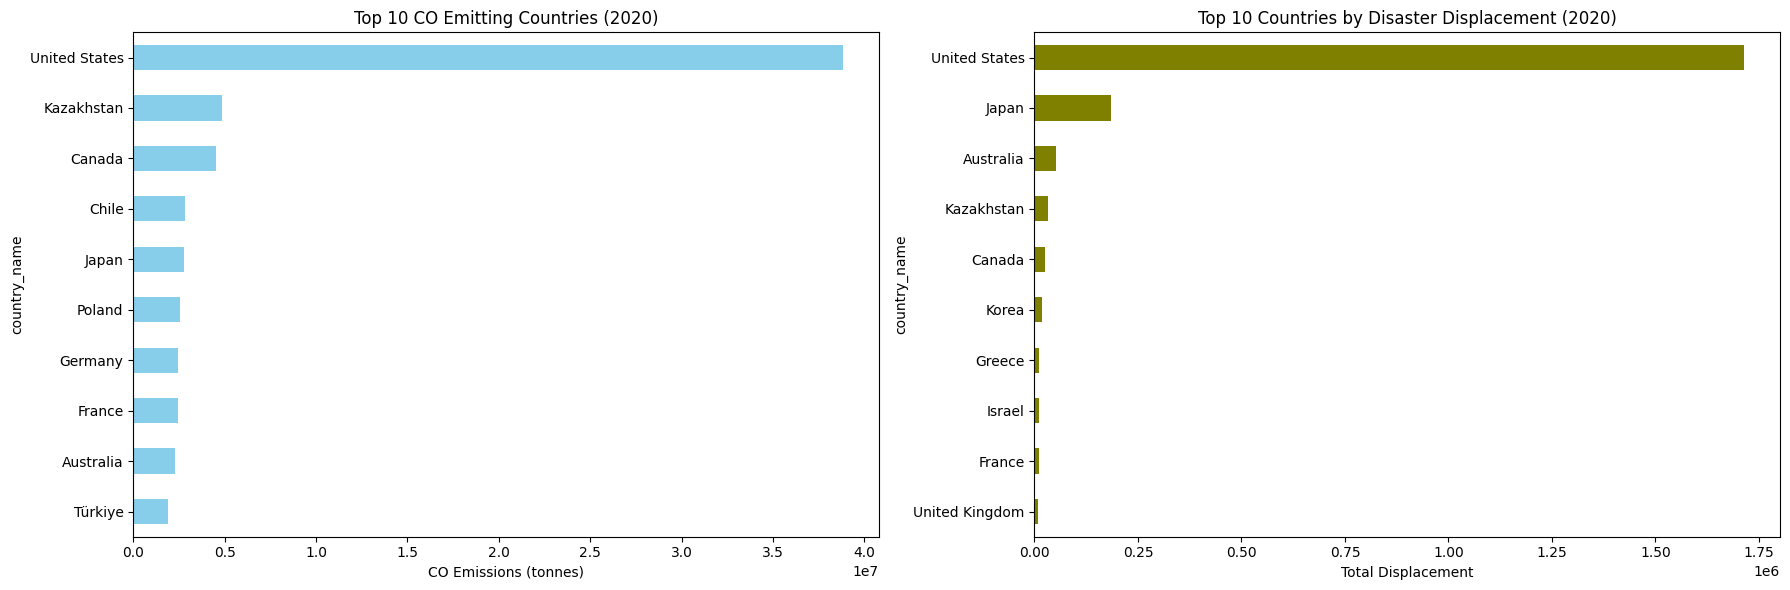

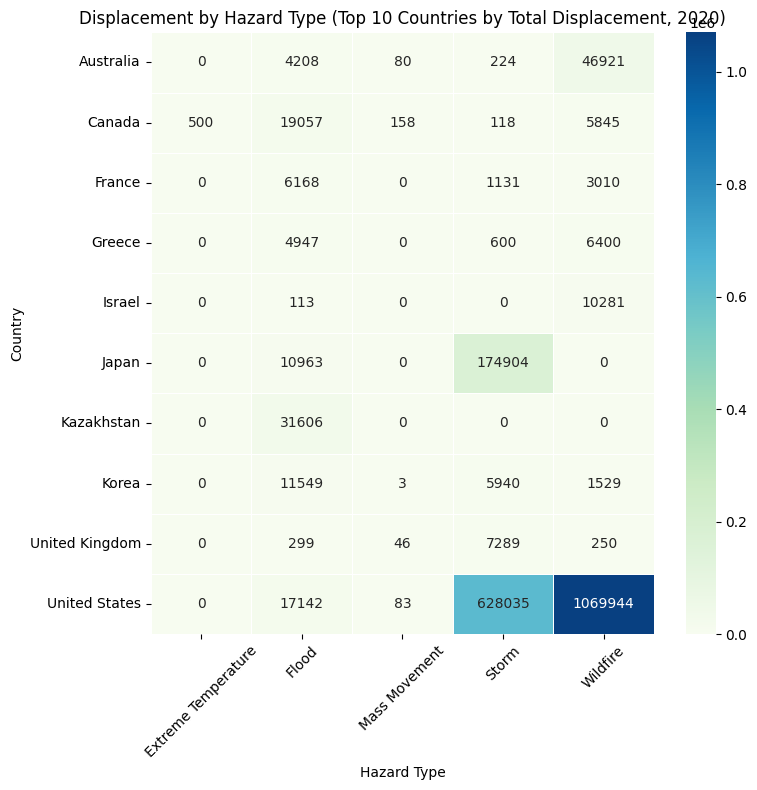

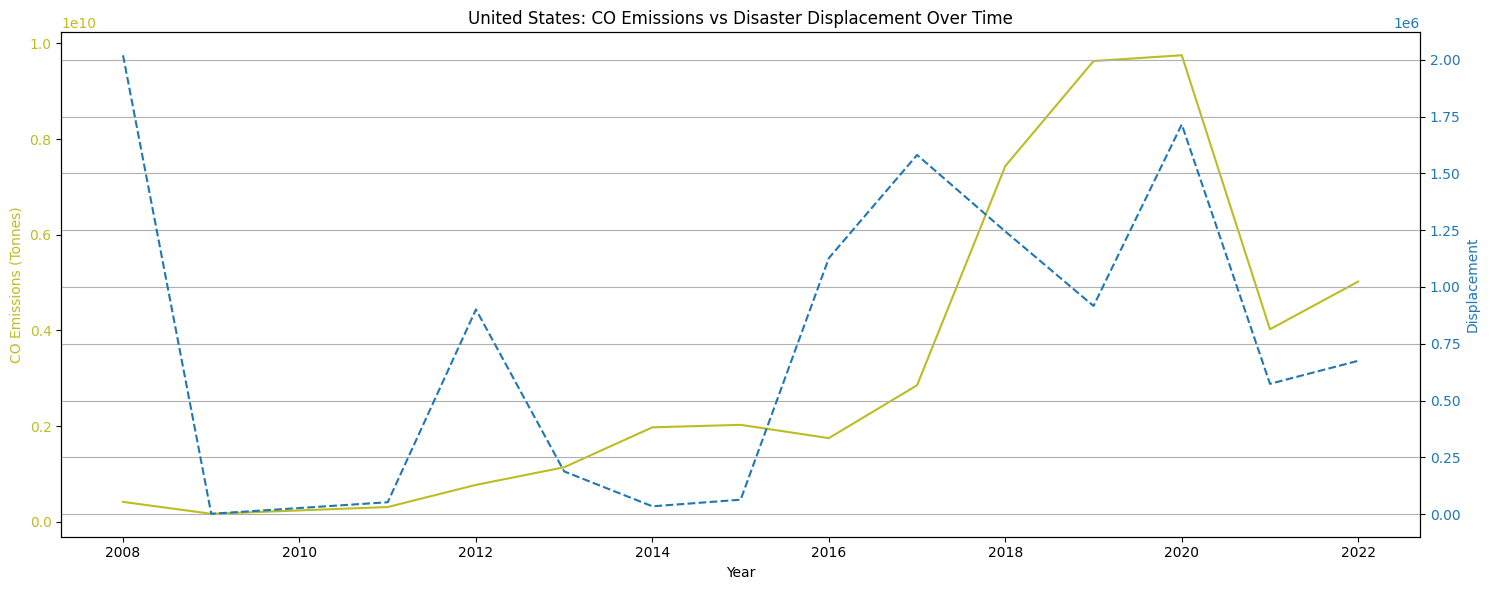

In [117]:
# Are the countries with the highest CO emissions also the most affected by disaster-induced displacement?
5

top10_emitters = df_2020.groupby('country_name')['CO_emissions_tonnes'].first().nlargest(10)
top10_displacement = df_2020.groupby('country_name')['displacement'].sum().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
top10_emitters.sort_values().plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 CO Emitting Countries (2020)')
axes[0].set_xlabel('CO Emissions (tonnes)')
top10_displacement.sort_values().plot(kind='barh', ax=axes[1], color='olive')
axes[1].set_title('Top 10 Countries by Disaster Displacement (2020)')
axes[1].set_xlabel('Total Displacement')
plt.tight_layout()
plt.show()

# What types of hazards drive displacement in the most affected countries?
top10_countries = top10_displacement.index
hazard_df = df_2020[df_2020['country_name'].isin(top10_countries)]

hazard_grouped = hazard_df.groupby(['country_name', 'hazard_type_name'])['displacement'].sum().reset_index()
heatmap_data = hazard_grouped.pivot(index='country_name', columns='hazard_type_name', values='displacement').fillna(0)

plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="GnBu", linewidths=0.5)
plt.title("Displacement by Hazard Type (Top 10 Countries by Total Displacement, 2020)")
plt.ylabel("Country")
plt.xlabel("Hazard Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# How have emissions and displacement trends evolved over time in the country with the highest total displacement?
highest_disp_country = merged_df.groupby("country_name")["displacement"].sum().idxmax()
country_df = merged_df[merged_df["country_name"] == highest_disp_country].sort_values("year")
trend_df = country_df.groupby("year")[["CO_emissions_tonnes", "displacement"]].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.set_xlabel("Year")
ax1.set_ylabel("CO Emissions (Tonnes)", color='tab:olive')
ax1.plot(trend_df["year"], trend_df["CO_emissions_tonnes"], color='tab:olive', label="Emissions")
ax1.tick_params(axis='y', labelcolor='tab:olive')

ax2 = ax1.twinx()
ax2.set_ylabel("Displacement", color='tab:blue')
ax2.plot(trend_df["year"], trend_df["displacement"], color='tab:blue', linestyle="--", label="Displacement")
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title(f"{highest_disp_country}: CO Emissions vs Disaster Displacement Over Time")
fig.tight_layout()
plt.grid(True)
plt.show()